# Forecasting with ARMA processes

Let $x_t$ follow a stationary ARMA process. The Wold decomposition states that every stationary ARMA process can be represented as MA($\infty$).

$$
\begin{align}
x_t = \mu + \sum_{j = 0}^{\infty} \psi_j e_{t - j}, \quad e_t \sim N(0, \sigma^2)
\end{align}
$$

with the restriction that $\psi_0 = 1$ and that the square sum of the coefficients is finite:

$$
\sum_{j = 0}^{\infty} \psi_j^2 \le \infty.
$$


The latter condition ensures that the process has a finite variance. This representation is of limited practical
use, because it contains an _infinite_ number of parameters (which cannot be estimated with finite data). However,
it helps to develop the theoretical properties of all ARMA processes. For example, the variance is really easy
to calculate, because the lags of the white noise process are uncorrelated by assumption:

$$
\begin{align}
Var(x_t) & = Var(\mu) + Var\left(\sum_{j = 0}^{\infty} \psi_j e_{t - j}\right) \\
& = 0 + \sum_{j = 0}^{\infty} Var(\psi_j e_{t - j}) \\
& = \sum_{j = 0}^{\infty} \psi_j^2 Var(e_{t - j}) \\
& = \sum_{j = 0}^{\infty} \psi_j^2 \sigma^2 \\
& = \sigma^2 \sum_{j = 0}^{\infty} \psi_j^2 \\
\end{align}
$$

Let

$$
\hat{y}_t(h) = \mu + \sum_{k = 0}^{\infty} \theta_k^{h} e_{t - k}
$$

be a function that predicts the value of a time series $h$ periods given the history of the series up to time $t$. The error between the value of the process and the prediction for a $h$-steps forecast is the difference between the value of the process $x_{t + h}$ and the forecast:

$$
x_{t + h} - \hat{y}_{t}(h)
$$

it can be shown, that the forecast function with the smallest expected squared error is the conditional expectation of $x_{t + h}$ given the information up to time $t$.

To obtain an expression for the forecast error process, consider the conditional mean of the
white noise process. We write $E_t$ to denote the conditional mean given the information up to and including time $t$.

$$
\begin{align}
E_t(e_{t + h}) =
\begin{cases}
e_{t + h} & h \leq 0 \\
0 & h > 0
\end{cases}
\end{align}
$$

The Wold representation of $x_{t + h}$ is

$$
x_{t + h} = \mu + \psi_0 e_{t + h} + \psi_1 e_{t + h - 1} + \ldots + \psi_h e_t + \psi_{h + 1} e_{t - 1} + \psi_{h + 1} e_{t - 1} + \ldots
$$

The conditional mean is:

$$
E_t(x_{t + h}) = \mu + E_t(\psi_0 e_{t + h}) + E_t(\psi_1 e_{t + h - 1}) + E_t(\ldots) + E_t(\psi_h e_t) + E_t(\psi_{h + 1} e_{t - 1}) + E_t(\psi_{h + 1} e_{t - 1}) + E_t(\ldots)\\
E_t(x_{t + h}) = \mu + \psi_h e_t + \psi_{h + 1} e_{t - 1} + \psi_{h + 1} e_{t - 1} + \ldots
$$

Therefore, the forecast error for the h-steps forecast is:

$$
\begin{align}
f_t(h) = x_{t + h} - E_t(x_{t + h}) = \psi_0 e_{t + h} + \psi_1 e_{t + h - 1} + \psi_2 e_{t + h - 2} +  \ldots
\end{align}
$$

In order to compute prediction intervals, we need the variance of the forecast errors.
This is especially easy for the 1-step ahead forecast:

$$
f_t(1) = e_{t + 1}
$$

and its variance is simply the variance of $e_{t + 1}$ that we have set to $\sigma^2$ by assumption.

$$
Var(f_t(1)) = Var(e_{t + 1}) = \sigma^2
$$

For a two-steps ahead forecast we get:

$$
f_{t}(2) = e_{t + 2} + \psi_1 e_{t + 1}
$$

As the white noise process $e_t$ is uncorrelated (zero covariances), the variance of the forecast errors is simply the sum of the variances of the terms in the sum:

$$
Var(f_{t}(2)) = Var(e_{t + 2}) + Var(\psi_1 e_{t + 1})\\
Var(f_{t}(2)) = \sigma^2 + \psi_1^2 \sigma^2\\
Var(f_{t}(2)) = (1 + \psi_1^2) \sigma^2
$$

For the 3-steps ahead forecast:

$$
f_{t}(3) = e_{t + 3} + \psi_1 e_{t + 2} + \psi_2 e_{t + 1}\\
Var(f_{t}(3)) = (1 + \psi_1^2 + \psi_2^2)\sigma^2
$$

Continuing this, we can find the variance of the h-steps ahead forecast:

$$
Var(f_t(h)) = (1 + \psi_1^2 + \psi_2^2 + \ldots \psi_{h - 1}^2)\sigma^2
$$

To construct approximate 95% prediction intervals for time $t + h$ given the history of the process up to and including $t$:

$$
\hat{y}_t(h) \pm 1.96 \sqrt{Var(f_t(h))}
$$

The $1.96$ factor is the $0.975$ quantile of the standard normal distribution. We must view these prediction intervals with caution, as these are based on the assumption that the forecast errors are approximately normally distributed, uncorrelated and with a constant variance over time. This prediction interval does not account for the uncertainty of estimation that is inherent in the fitting of any model, including the ARIMA models that we study here.


### Forecasting with AR(1)

For a (stationary: $|\phi_1| < 1$) AR(1) process:

$$
x_t = \phi_0 + \phi_1 x_{t - 1} + e_t, e_t \sim WN(\sigma^2)
$$

The optimal forecast is the conditional mean of $x_{t + h}$ given the information (history of the process) up to and including $t$. We write $E_t$ to denote this conditional expectation. For a white noise process $e_t$ the conditional expectation for $t + h$ is:

$$
E_t(e_{t + h}) = \begin{cases}
e_{t + h} & h \leq 0 \\
0 & h > 0
\end{cases}
$$

the conditional mean at time $t + h$ is:

$$
\begin{align}
E_t(x_{t + h}) & = E_t(\phi_0 + \phi_1 y_{t + h - 1} + e_{t + h}) \\
E_t(x_{t + h}) & = \phi_0 + E_t(\phi_1 y_{t + h - 1}) \\
E_t(x_{t + h}) & = \phi_0 + \phi_1 \hat{y}_{t}(h - 1)
\end{align}
$$

Finally, we obtain:

$$
\hat{y}_t(h) = \phi_0 + \phi_1 \hat{y}_{t}(h - 1)
$$

We can solve this by substituting recursively:

For $h = 1$:

$$
\hat{y}_{t}(1) = \phi_0 + \phi_1 \hat{y}_t(0) = \phi_0 + \phi_1 x_t
$$

For $h = 2$:

$$
\begin{align*}
\hat{y}_{t}(2)  & = \phi_0 + \phi_1 \hat{y}_t(1) \\
& = \phi_0 + \phi_1 (\phi_0 + \phi_1 \hat{y}_t(0)) \\
& = \phi_0 + \phi_1 \phi_0 + \phi_1 ^2 \hat{y}_t(0) \\
& = \phi_0 (1 + \phi_1) + \phi_1^2 x_t
\end{align*}
$$

Continuing with the substitution leads to:

$$
\begin{align*}
\hat{y}_t(h)    & = \phi_0 (1 + \phi_1 + \phi_1^2 + \ldots + \phi_1^{h - 1}) + \phi_1^h x_t \\
& = \frac{1 - \phi_1^h}{1 - \phi_1}\phi_0 + \phi_1^h x_{t}
\end{align*}
$$

To derive the variance of the forecast error it is convenient to use the MA($\infty$) representation
of the AR(1) process (Wold representation).

$$
\begin{align}
x_t & = \phi_0 + \phi_1 x_{t - 1} + e_t\\
(1 - \phi_1 L) x_t =  \\
x_t & = \frac{\phi_0}{1 - \phi_1 L} + \frac{e_t}{1 - \phi_1 L} \\
x_t & = \frac{\phi_0}{1 - \phi_1} + (1 + \phi_1 L + \phi_1^2 L^2 + \phi_1^3 L^3 + \ldots) e_{t}\\
x_t & = \frac{\phi_0}{1 - \phi_1} + e_t + \phi_1 e_{t - 1} + \phi_1^2 e_{t - 2} + \phi_1^3 e_{t - 3} + \ldots \\
x_t & = \mu + e_t + \phi_1 e_{t - 1} + \phi_1^2 e_{t - 2} + \phi_1^3 e_{t - 3} + \ldots
\end{align}
$$

We can use this equation to obtain the forecast error for the AR(1) process:

$$
f_t(h) = x_{t + h} - \hat{y}_t(h) = e_{t + h} + \phi_1 e_{t + h - 1} + \phi_1^2 e_{t + h - 1} + \ldots + \phi_1^{h - 1} e_{t + 1}
$$
Now it is easy to calculate the variance of the forecast error:

$$
\begin{align}
Var(f_t(h)) & = \sigma^2 + \phi_1^2 \sigma^2 + \phi_1 ^ 4 \sigma^2 + \ldots + \phi_1^{2(h - 1)}\sigma^2 \\
& = (1 + \phi_1^2 + \phi_1^4 + \ldots \phi_1^{2(h - 1)})\sigma^2\\
& = \frac{1 - \phi_1^{2h}}{1 - \phi_1^2}\sigma^2
\end{align}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

ar1 = 2 + arma_generate_sample(ar=[1, -0.75], ma=[1], nsample=100, scale=1)

model_ar1 = ARIMA(ar1, order=(1, 0, 0))
results_ar1 = model_ar1.fit()
print("AR(1) Model Summary:")
print(results_ar1.summary())

AR(1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -137.959
Date:                Mon, 10 Nov 2025   AIC                            281.919
Time:                        08:28:48   BIC                            289.734
Sample:                             0   HQIC                           285.082
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5501      0.298      5.204      0.000       0.966       2.134
ar.L1          0.6715      0.085      7.937      0.000       0.506       0.837
sigma2         0.9188      0.16

In [10]:
forecast = results_ar1.forecast(steps=3)
print("3-step Forecast:")
print(forecast)

3-step Forecast:
[2.31499836 2.06372755 1.89499706]


In [12]:
forecast_df = results_ar1.get_forecast(steps=3)
forecast_summary = forecast_df.summary_frame()
print(forecast_summary)

y      mean   mean_se  mean_ci_lower  mean_ci_upper
0  2.314998  0.958535       0.436305       4.193692
1  2.063728  1.154596      -0.199239       4.326694
2  1.894997  1.232847      -0.521338       4.311333


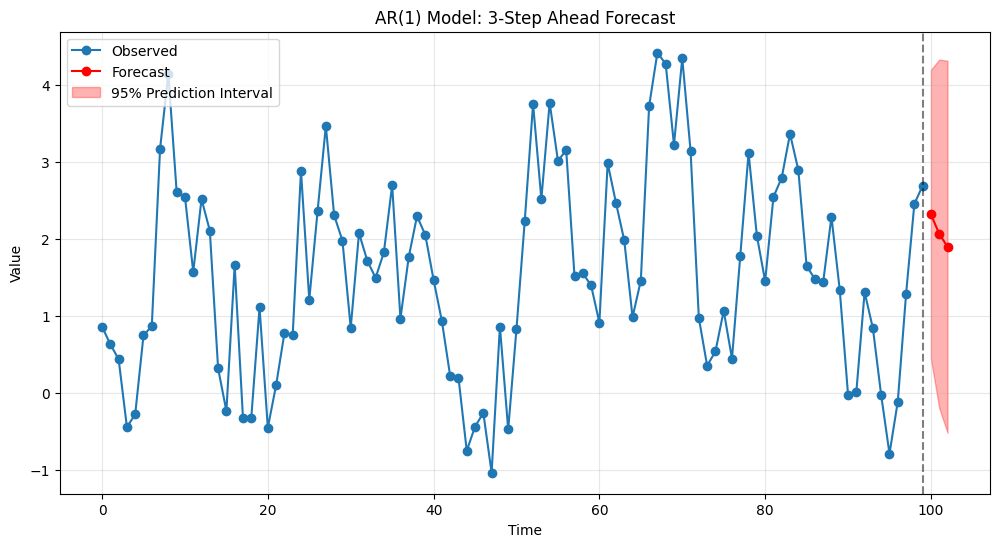

In [13]:
# Visualize the forecasts
plt.figure(figsize=(12, 6))
plt.plot(ar1, label='Observed', marker='o')
plt.plot(range(len(ar1), len(ar1) + 3), forecast, 
         label='Forecast', marker='o', color='red')

# Add prediction intervals
plt.fill_between(range(len(ar1), len(ar1) + 3),
                 forecast_summary['mean_ci_lower'],
                 forecast_summary['mean_ci_upper'],
                 alpha=0.3, color='red', label='95% Prediction Interval')

plt.axvline(x=len(ar1)-1, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR(1) Model: 3-Step Ahead Forecast')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## Forecasting MA(1)

The moving average process of order one is given by:

$$
x_t = \phi_0 + e_t + \theta_1 e_{t - 1}
$$

The conditional (given the history up to and including $t$) mean of $x_{t + h}$ is:

$$
E_t(x_{t + h}) = \phi_0 + E_t(e_{t + h}) + \theta_1 E_t (e_{t + h - 1})
$$

For a one step ahead prediction ($h = 1$):

$$
E_{t}(y_{t + 1}) = \phi_0 + E_t(e_{t + 1}) + \theta_1 E_t(e_{t})
$$

Predictions for periods that exceed the order of the MA process (here we have $q = 1$):

$$
E_t(x_{t + h}) = \phi_0
$$


## Forecasting ARIMA(1, 0, 1)

Let us combine the methods used for forecasting the AR(1) and the MA(1) models.

$$
x_t = \phi_0 + \phi_1 x_{t - 1} + e_t + \theta_1 e_{t - 1}
$$

The conditional mean of $y_{t + 1}$ given the history of the process up to and including $t$ is:

$$
\hat{y}_t(1) = E_t(y_{t + 1}) = \phi_0 + \phi_1 x_t + E_t(e_{t + 1}) +  \theta_1 e_{t}
$$

The problem here is that $e_t$ is not observable, and therefore we cannot use the equation above directly. Instead, we need to estimate $e_t$ from the forecast errors:

$$
\hat{e}_t = x_t - \hat{y}_{t - 1}(1)
$$

For $t = 0$ the forecast is:

$$
\hat{y}_{0}(1) = \phi_0 + \phi_1 y_0 + \theta_1 e_0\\
$$

For $t = 1$:

$$
\begin{align}
\hat{y}_{1}(1)  & = \phi_0 + \phi_1 y_1 + \theta_1 e_1 \\
& = \phi_0 + \phi_1 y_1 + \theta_1 (y_1 - \hat{y}_{0}(1)) \\
& = \phi_0 + \phi_1 y_1 + \theta_1 (y_1 - (\phi_0 + \phi_1 y_0 + \theta_1 e_0)) \\
& = \phi_0 (1 - \theta_1) + (\phi_1 + \theta_1)y_1 - \theta_1 \phi_1 y_0 + \theta_1^2e_0
\end{align}
$$

We can continue substituting until we finally get an (admittedly) long expression for the forecast at time $t$.

$$
\begin{align}
\hat{y}_{t}(1) = & \phi_0(1 -\theta_1 - \theta_1^2 - \theta_1^t) +\\ 
& (\phi_1 - \theta_1) x_t - \theta_1(\phi_1 + \theta_1)) x_{t - 1} +\\
& \ldots +\\
& \theta_1^{t - 1}(\phi_1 + \theta_1) y_1 + \theta_1^t \phi_1 y_0 + \theta_1^{t + 1} e_0
\end{align}
$$

To calculate the predictions for more than one period, you can use the recursive relationship:

$$
\begin{align}
\hat{y}_t(2) = & \phi_0 + \phi_1 \hat{y}_t(1)\\
\hat{y}_t(3) = & \phi_0 + \phi_1 \hat{y}_t(2)\\
& \vdots\\
\end{align}
$$

## Forecasting ARIMA processes

If the process is ARIMA with $d = 1$, then we need to de-difference the forecast:

$$
\hat{y}_t(h) = x_t + \Delta \hat{y}_{t}(1) + \Delta \hat{y}_{t}(2) + \ldots + \Delta \hat{y}_{t}(h)
$$

If the process is ARIMA with $d = 2$:

$$
\hat{y}_t(h) = x_t + \left(\Delta x_t + \phi_0^2 \hat{y}_{t}(1)\right) + \left(\Delta x_t + \Delta^2 \hat{y}_{t}(1) \Delta^2 \hat{y}_t(2)\right) + \ldots + \left(\Delta x_t + \Delta^2 \hat{y}_{t}(1) \Delta^2 \hat{y}_t(2) + \ldots + \Delta^2\hat{y}_t(h)\right)
$$



## Example from the Lecture: ARIMA(1, 1, 1)

$$
\Delta x_t = 0.1 \Delta y_{t−1} + e_t + 0.2 e_{t−1}
$$

Compute the one-step ahead forecast of the model given the values

| t   | y   | $x _t = \Delta x_t$ | $\hat{x}_{t - 1}(1)$                            | $\hat{e}_{t}$            |
|-----|-----|-----------------------|-------------------------------------------------|--------------------------|
| -1  |     |                       |                                                 |                          |
| 0   | -11 | NA                    |                                                 |                          |
| 1   | 2   | 13                    |                                                 | $0$                      |
| 2   | 5   | 3                     | $0.1\cdot(13) + 0.2\cdot 0 = 1.3$               | $3 - 1.3 = 1.7$          |
| 3   | -1  | -6                    | $0.1\cdot(3) + 0.2\cdot 1.7 = 0.64$             | $-6 - 0.64 = -6.64$      |
| 4   | 13  | 14                    | $0.1\cdot(-6) + 0.2\cdot (-6.64) = -1.928$      | $14 - (-1.928) = 15.928$ |
| T=5 | 4   | -9                    | $0.1\cdot(14) + 0.2\cdot (15.928) = 4.5856$     | $-9 - 4.5856 = -13.5856$ |
| 6   | ?   |                       | $0.1\cdot(-9) + 0.2\cdot (-13.5856) = -3.61712$ | $0$                      |
| 7   | ?   |                       | $0.1\cdot(-3.61712) + 0.2\cdot 0 = -0.361712$   |                          |

To calculate the forecast, start with the observation at $t = 2$. For the observations before that there are no available values. For the sake of convenience, we will set $\Delta x_t = x_t$. The optimal forecast is given by the conditional mean of the series:

$$
\begin{align}
\hat{x}_{t}(1) & = E_{t}(x_{t + 1}) = E_{t}(0.1 x_t + e_{t + 1} + 0.2 e_{t}) \\
\hat{x}_{t}(1) & = E_{t}(x_{t + 1}) = 0.1 x_t + 0.2 \hat{e}_{t}
\end{align}
$$

Let's calculate the one step ahead forecast for $x_2$:

$$
\hat{x}_{1}(1) = E_{1}(x_{2}) = 0.1 x_1 + 0.2 \hat{e}_{1}
$$

For the next steps we will estimate $e_{t}$ from the forecast error but for the initial values (where we cannot compute the residual) we will set $e_{1} = 0$. There are different ways to choose the initial values, but this is the simplest one and is used in the `predict.Arima` function in R. Note that that the example in the lecture uses another approach.

$$
\hat{x}_{1}(1) = 0.1 \cdot 13 + 0.2 \cdot 0 = 1.3
$$

The forecast for $x_3$ is:

$$
\begin{align}
\hat{x}_{2}(1) & = 0.1 x_{2} + 0.2 \hat{e}_{2}\\
\hat{e}_{2} & = x_2 - \hat{x}_1(1) = 3 - 1.3 = 1.7 \\
\hat{x}_{2}(1) & = 0.1 \cdot 3 + 0.2 1.7 = 0.64 \\
\end{align}
$$

We repeat this calculation until we get to the final step. Note that when forecasting $x_7$ the
forecast equation is:

$$
\hat{x}_{6}(1) = 0.1 \hat{x}_{6} = −0.36
$$

To get the prediction for $y_5$ and $y_6$, use apply the formula for reversing the differencing ($d = 1$):

$$
\hat{y}_t(h) = x_t + \phi_0 \hat{y}_{t}(1) + \phi_0 \hat{y}_{t}(2) + \ldots + \phi_0 \hat{y}_{t}(h)
$$

For the one step ahead prediction we obtain $(h = 1)$:

$$
\begin{align}
\hat{y}_t(1) & = x_t + \hat{x}_t(1) \\
\hat{y}_5(1) & = y_{5} + \hat{x}_5(1) = 4 + (−3.61712) = 0.38288
\end{align}
$$

For the two steps prediction we obtain $(h = 2)$

$$
\begin{align}
\hat{y}_t(2) & = x_t + \hat{x}_t(1) + \hat{x}_t(2) \\
\hat{y}_5(2) & = y_{5} + \hat{x}_5(1) + \hat{x}_5(2) = 4 + (−3.61712) + (−0.361712) = 0.021168
\end{align}
$$

We can verify the prediction using `arima` and `predict`. First, we enter the
values by hand and compute the first difference.

In [20]:
# \Delta x_t = 0.1 \Delta y_{t−1} + e_t + 0.2 e_{t−1}

y = np.array([-11, 2, 5, -1, 13, 4])

x = np.diff(y)

print("Original Series y:", y)
print("Differenced Series x:", x)

Original Series y: [-11   2   5  -1  13   4]
Differenced Series x: [13  3 -6 14 -9]


In [35]:
model = ARIMA(y, order=(1, 1, 1), trend='n')

results = model.fit_constrained({'ar.L1': 0.1, 'ma.L1': 0.2})
print(results.summary())
results.forecast(steps=2)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -19.223
Date:                Mon, 10 Nov 2025   AIC                             40.446
Time:                        09:30:48   BIC                             40.056
Sample:                             0   HQIC                            39.398
                                  - 6                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1 (fixed)     0.1000        nan        nan        nan         nan         nan
ma.L1 (fixed)     0.2000        nan        nan        nan         nan         nan
sigma2          125.6172    151.747     

c:\Users\boyko\stats\ts2025\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\boyko\stats\ts2025\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


array([0.38670036, 0.0253704 ])

In [36]:
results.resid

array([-11.        ,  13.00042704,  -0.68343784,  -6.16376649,
        15.83258952, -13.56650108])


## Example with ARIMA(2, 1, 1)

$$
\Delta y_t = 0.1 \Delta y_{t−1} + 0.3 \Delta y_{t - 2} + e_t + 0.2 e_{t−1}
$$

Again, set $x_t = \Delta y_t$ to get a regular ARMA(2, 1) model.

$$
x_t = 0.1 x_{t - 1} + 0.3 x_{t - 2} + e_t + 0.2 e_{t−1}
$$

The optimal forecast is (again) the conditional mean of the process:

$$
\hat{x}_{t}(1) = 0.1 x_t + 0.3 x_{t - 1} + 0.2 \hat{e}_{t}
$$

Your first prediction will be for $t = 3$, because you have no values for $x$ before $t = 1$.

$$
\hat{x}_2(1) = 0.1x_{2} + 0.3 x_{1} + \hat{e}_{2} = 0.1 \cdot 3 + 0.3 \cdot 13 + 0 = 4.2
$$

As you cannot estimate $e_2$ from the residuals, set it to zero. With this estimate, the forecast error is

$$
\hat{e}_{3} = x_3 - \hat{x}_2(1) = -6 - 4.2 = -10.2
$$

You will use this error in the next step to calculate the forecast for $x_4$:

$$
\hat{x}_3(1) = 0.1 x_{3} + 0.3 x_{2} + \hat{e}_3 = 0.1 \cdot (-6) + 0.3 \cdot 3 + 0.2 \cdot (-10.2) = -1.74
$$

You continue this way until you reach the $t = 7$. Then you apply the de-differencing formula as in the previous example.


| t   | y   | $x _t = \Delta x_t$ | $\hat{x}_{t - 1}(1)$ | $\hat{e}_{t}$          |
|-----|-----|-----------------------|----------------------|------------------------|
| -1  |     |                       |                      |                        |
| 0   | -11 | NA                    |                      |                        |
| 1   | 2   | 13                    |                      | $0$                    |
| 2   | 5   | 3                     |                      | $0$                    |
| 3   | -1  | -6                    | 4.2                  | $-6 - 4.2 = -10.2$     |
| 4   | 13  | 14                    | -1.74                | $14 - (-1.74) = 15.74$ |
| T=5 | 4   | -9                    |                      | $-11.748$              |
| 6   | ?   |                       |                      | $0$                    |
| 7   | ?   |                       |                      | $0$                    |


## Example with ARIMA(1, 1, 2)

$$
\Delta x_t = 0.1 \Delta y_{t−1} + e_t + 0.2 e_{t−1} + 0.3 e_{t -2}
$$

Substituting $\Delta x_t = x_t$:

$$
x_t = 0.1 x_{t−1} + e_t + 0.2 e_{t−1} + 0.3 e_{t -2}
$$

The optimal forecast is given by:

$$
\hat{x}_{t}(1) = 0.1 x_{t} + 0.2 \hat{e}_{t} + 0.3 \hat{e}_{t - 1}
$$

The first prediction for $x_2$ is given by:

$$
\hat{x}_1(1) = 0.1 x_{1} + 0.2 \hat{e}_{1} + 0.3 \hat{e}_{0}
$$

Initializing the forecast error series with zeroes we get:

$$
\hat{x}_1(1) = 0.1 \cdot 13 + 0.2 \cdot 0 + 0.3 \cdot 0 = 1.3 \\
\hat{e}_2 = 3 - 1.3 = 1.7
$$

The next forecast error is:

$$
\hat{x}_2(1) = 0.1 x_{2} + 0.2 \hat{e}_2 + 0.3 \hat{e}_1\\
\hat{x}_2(1) = 0.1 \cdot 3 + 0.2 \cdot 1.7 + 0.3 \cdot 0 = 0.64\\
\hat{e}_3 = -6 - 0.64 = -6.64
$$

and then:

$$
\hat{x}_3(1) = 0.1 x_{3} + 0.2 \hat{e}_3 + 0.3 \hat{e}_2\\
\hat{x}_3(1) = 0.1 \cdot (-6) + 0.2 \cdot (-6.64) + 0.3 \cdot 1.7 = -1.418\\
\hat{e}_4 = 14 - (-1.418) = 15.418
$$


```{r}
fit_ARIMA_1_0_2 <- arima(
  x,
  order = c(1, 0, 2),
  fixed = c(0.1, 0.2, 0.3, 0),
  method = "CSS"
)
fit_ARIMA_1_0_2
```

```{r}
residuals(fit_ARIMA_1_0_2)
```


| t   | y   | $x _t = \Delta x_t$ | $\hat{x}_{t - 1}(1)$ | $\hat{e}_{t}$  |
|-----|-----|-----------------------|----------------------|----------------|
| -1  |     |                       |                      |                |
| 0   | -11 | NA                    |                      | $0$            |
| 1   | 2   | 13                    |                      | $0$            |
| 2   | 5   | 3                     | 1.3                  | $1.7$          |
| 3   | -1  | -6                    | 0.64                 | $-6.64$        |
| 4   | 13  | 14                    |                      | $15.418$       |
| T=5 | 4   | -9                    |                      | $-11.4916$     |
| 6   | ?   |                       |                      |                |
| 7   | ?   |   